# Artificial Intelligence - 2nd Assignment

- Firstly, we import the necessary libraries, packages and methods.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Machine Learning
from scipy import stats
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import linear_model,preprocessing
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable 

<hr>
<br>

## 1. Dataset Analysis and Review

dataFrame = pd.read_csv('../files/card_transdata.csv')
dataFrame.fillna(value=0,inplace=True)
dataFrame.head()

Attributes:
 
Attribute | Type | Properties | Discrete vs Continuous |
| - | - | - | - |
| Distance from home | Ratio |  Distinctness, Order, Meaningful differences and Meaningful ratios | Continuous |
| Distance from last transaction | Ratio | Distinctness, Order, Meaningful differences and Meaningful ratios | Continuous |
| Ratio of purchased price to median purchased price | Ratio |  Distinctness, Order, Meaningful differences and Meaningful ratios | Continuous |
| Repeat Retailer | Nominal (binary) | Distinctness | Discrete |
| Used chip (used credit card) | Nominal (binary) | Distinctness | Discrete | 
| Used pin (used pin number) | Nominal (binary) | Distinctness | Discrete |
| Online Order | Nominal (binary) | Distinctness | Discrete |


In [175]:
dataFrame = pd.read_csv('../files/card_transdata.csv')
dataFrame.fillna(value=0,inplace=True)
dataFrame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<hr>
<br>

- In this section, we are calculating and printing basic statistics about our dataset.

<br>
<br>

| Task | Attribute set (x) | Class Label (y) |
| - | - | - |
| Identify if a transaction is fraud or not | Distance from home (where the transaction happened), Distance from the last transaction, Ratio of purchased price to median purchased price, Repeat Retailer (Bought from that retailer before), Used chip (used credit card), Used pin (used pin number), Online order | Fraud (or not) |

In [176]:
count = dataFrame['fraud'].value_counts()

totalTransactions = count[1] + count[0]
noFrauds = count[1]
fraudRate = noFrauds/totalTransactions * 100

print("Number of frauds: " + str(noFrauds))
print("Number of transactions: " + str(totalTransactions))
print("Frauds Percentage: " + str(fraudRate))


Number of frauds: 87403
Number of transactions: 1000000
Frauds Percentage: 8.7403


<hr>
<br>


- Now, we're checking if our dataset has any missing values, 'NA' or 'NULL' values.
- If yes, then we remove them.
- For this specific dataset there aren't any missing or null values.

In [177]:
print(dataFrame.isna().sum())
print(dataFrame.isnull().sum())
dataFrame = pd.read_csv('../files/card_transdata.csv', na_values=['NA'])
dataFrame.dropna()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


<hr>
<br>

- Now we are checking if there is any duplicated data.
- If yes, we remove duplicated objects.
- For this specific dataset, there isn't any duplicated data.

In [178]:
length = len(dataFrame)
dataFrame.drop_duplicates(keep = False)
cleanedDups = len(dataFrame)

print("Original dataset length: ", length)
print("Number of dups: ", length - cleanedDups)

Original dataset length:  1000000
Number of dups:  0


<hr>
<br>

- You can now find basic statistics about our problem.

In [179]:
dataFrame.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<hr>
<br>

sdfgsdg

In [180]:
%matplotlib inline

#sns.pairplot(dataFrame, hue='fraud')

<hr>
<br>

- In this step, we use a sample of our dataset since the given one is too long, reaching 1000000 objects.
- After that, we create two new datasets: one only containing fraudlent transactions (fraud attribute = 1) and another contaning only non-fraudlent transactions (fraud attribute = 0)

In [181]:
#No fraud (class == 0) meaning legit transactions
#Fraud (class == 1) meaning fraudulent transactions

#Creating new data frames for No fraud and Fraud cases
no_fraud=dataFrame[dataFrame.fraud == 0]
fraud=dataFrame[dataFrame.fraud == 1]

#Resampling the original dataset with 10,000 datapoints
no_fraud_resample=no_fraud.sample(n=5000)
fraud_resample=fraud.sample(n=5000)

#Creating new dataset consisting of equal class occurence 
data=pd.concat([no_fraud_resample,fraud_resample],axis=0)

3. Preprocessing Data

- Removing outliers fom non-nominal attributes

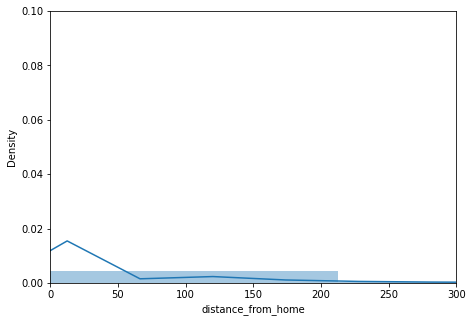

In [182]:
dataFrame = dataFrame.sample(5000)

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

scale_factor_x = 300
scale_factor_y = 0.1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)

sns.distplot(fraud['distance_from_home'])
plt.show()

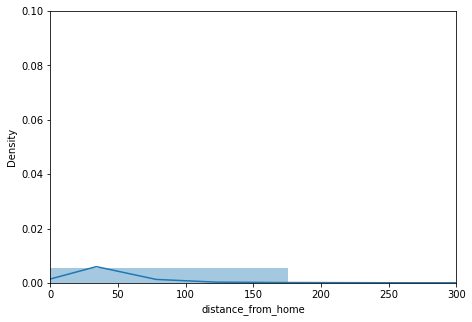

In [183]:
dataFrame = dataFrame.sample(5000)

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

scale_factor_x = 300
scale_factor_y = 0.1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)

sns.distplot(no_fraud['distance_from_home'])
plt.show()

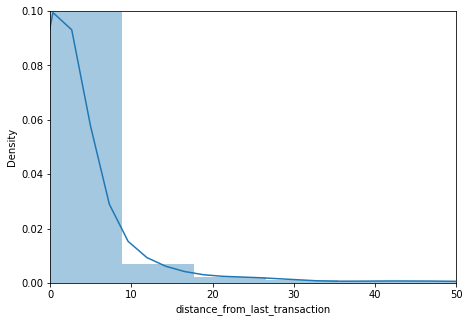

In [184]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

scale_factor_x = 50
scale_factor_y = 0.1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)

sns.distplot(dataFrame['distance_from_last_transaction'])
plt.show()

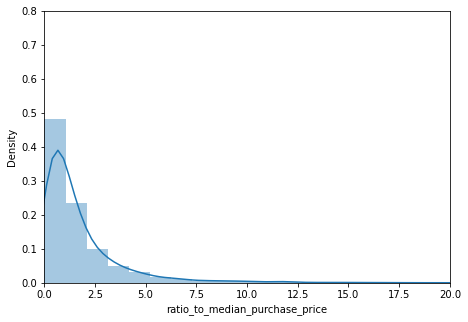

In [185]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

scale_factor_x = 20
scale_factor_y = 0.8
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor_x, xmax * scale_factor_x)
plt.ylim(ymin * scale_factor_y, ymax * scale_factor_y)

sns.distplot(dataFrame['ratio_to_median_purchase_price'])
plt.show()

In [186]:
#Creating dataframe for target
target=data['fraud']

#Creating dataframe for features
features=data.drop(columns=['fraud'],axis=1)

In [187]:
#Splitting the dataset
train_features,test_features,train_labels,test_labels = train_test_split(features,target,stratify=target,shuffle=True,random_state=43)

In [188]:
#Standardising the dataset
scale=MinMaxScaler().fit(train_features)
train_features_scaled=scale.transform(train_features)
test_features_scaled=scale.transform(test_features)

In [189]:
#Creating empty list to store model evaluation values
data_all=[]

4. Model Training

In [190]:
model_name='RandomForest'
model = RandomForestClassifier()
param_rf={
    "n_estimators":range(2,15,2),
    "max_features":range(1,7),
    "max_depth":range(1,10)
}
random_rf=RandomizedSearchCV(estimator=model, param_distributions=param_rf, n_iter = 15, cv = 10,scoring='accuracy', verbose=2, n_jobs=-1,random_state=43)

In [191]:
model_name='SVM'
model= SVC()
param_svm={
    "C":[100,10,1,0.1],
    "gamma": [10,1,0.1,0.001],
    "kernel": ['rbf']
    }

random_svm=RandomizedSearchCV(estimator=model, param_distributions=param_svm, n_iter = 15 , scoring='accuracy', cv = 10, verbose=2, n_jobs=-1,random_state=43)
random_svm.fit(train_features_scaled,train_labels)

model=random_svm.best_estimator_
crossval = cross_val_score(model,train_features_scaled,train_labels,cv=5,scoring='accuracy')
scores = np.mean(crossval)

test_pred=model.predict(test_features_scaled)
test_recall = recall_score(test_labels, test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(test_labels, test_pred, pos_label=1)
test_auc = auc(fpr, tpr)

print('Train acc:',round(scores*100,2),'%')
print('Test acc:',round(accuracy_score(test_labels,test_pred)*100,2),'%')
print('Best C:',random_svm.best_estimator_.get_params()['C'])
print('Best gamma:',random_svm.best_estimator_.get_params()['gamma'])
print('Best kernel:',random_svm.best_estimator_.get_params()['kernel']) 

test_pred=model.predict(test_features_scaled)
cm = confusion_matrix(test_labels, test_pred)
clr = classification_report(test_labels, test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix:SVM")
plt.show()
print("Classification Report:\n----------------------\n", clr)

if accuracy_score(test_labels,test_pred)-scores <1:
    result_model='Good Model'
    data_all.append([model_name,scores,accuracy_score(test_labels,test_pred),test_recall,test_auc,result_model])
else:
    result_model='Failed'
    data_all.append([model_name,scores,accuracy_score(test_labels,test_pred),test_recall,test_auc,result_model])

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   5.5s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   5.7s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   6.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   6.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   6.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   6.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   6.7s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   7.2s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   1.4s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   1.4s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   2.1s
[CV] END ..........................C=1, gamma=

KeyboardInterrupt: 

Defining a Function for Train and Test split - split is done on 80% train and 20% test (can be altered in test_size value). Initially done including all features.

In [ ]:
# Decision Tree model
des_tree_model = DecisionTreeClassifier()
drawing= des_tree_model.fit(x_train, y_train)
y_test_pred = des_tree_model.predict(x_test)
y_train_pred = des_tree_model.predict(x_train)
Accuracy_Test=accuracy_score(y_test, y_test_pred) * 100
Accuracy_Test= str(Accuracy_Test) + " %"
Accuracy_Train=accuracy_score(y_train, y_train_pred) * 100
Accuracy_Train= str(Accuracy_Train) + " %"
Train_Data_Score=des_tree_model.score(x_train, y_train) * 100
Train_Data_Score= str(Train_Data_Score) + " %"


#Construction of confusion matrix
confmat_train = confusion_matrix(y_train_pred, y_train)
confmat_test =  confusion_matrix(y_test_pred, y_test)
print ("\nConfusion matrix of Train Data\n", confmat_train)
print ("\nConfusion matrix of Test Data\n", confmat_test)
total=sum(sum(confmat_test))


#Calculation of Specificity
#Specificity = TN/(TN+FP)
sp = confmat_test[1,1]/(confmat_test[1,0]+confmat_test[1,1]) * 100
sp= str(sp) + " %"


#Calculation of sensitivity
#Sensitivity= TP/(TP+FN)
sensi = confmat_test[0,0]/(confmat_test[0,0]+confmat_test[0,1]) * 100
sensi= str(sensi) + " %"



myTable = PrettyTable(["Peformance Paramters", "Value"]) 
#Insert rows
myTable.add_row(["Accuracy of Test Data",Accuracy_Test]) 
myTable.add_row(["Accuracy of Train Data", Accuracy_Train]) 
myTable.add_row(["Data score of Train Data",Train_Data_Score]) 
myTable.add_row(["Specificity of the confusion matrix",sp]) 
myTable.add_row(["Sensitivity of the confusion matrix",sensi])

#print Output
print(myTable)

NameError: name 'x_train' is not defined

In [ ]:
# Confusion matrix of the Decision Tree
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_confusionmat(cm, lab, test_or_train):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    f = ax.matshow(cm, cmap=plt.cm.turbo)
    plt.title('Confusion Matrix of the ' + test_or_train +' Decision Tree \n')
    fig.colorbar(f)
    ax.set_xticklabels([''] + lab)
    ax.set_yticklabels([''] + lab)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    s = [['TP','FN'], ['FP', 'TN']]
    for k in range(2):
        for l in range(2):
            plt.text(l,k, str(cm[k][l]))
    plt.show()

In [ ]:
plot_confusionmat(confmat_train, ["0","1"], "Training")
plot_confusionmat(confmat_test, ["0","1"], "Testing")

In [ ]:
#Decision Tree Drawing :
plt.figure(figsize=[60,40])
tree.plot_tree(des_tree_model,fontsize=20, rounded=True,impurity=True, precision=2)
#tree.plot_tree(drawing,fontsize=20, rounded=True,impurity=True, precision=2)
plt.show()

1. Modeling

In [ ]:
y = dataFrame['fraud']
X = dataFrame.drop('fraud', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

2. Pre-processing

In [ ]:
# List of continuous features
conts = list(dataFrame.columns[:3])

# List of categorical (0/1) features
cats = list(dataFrame.columns[3:-1])

transformations = [('continuous', StandardScaler(), conts), ('categorical', OrdinalEncoder(), cats)]
pipeline = ColumnTransformer(transformations)

In [ ]:
train_transformed = pipeline.fit_transform(X_train)

3. Baseline Model

In [ ]:
baseline = LogisticRegression(max_iter=110)

In [ ]:
baseline.fit(train_transformed, y_train)

In [ ]:
test_transformed = pipeline.transform(X_test)

baseline_preds = baseline.predict(test_transformed)

In [ ]:
baseline.score(test_transformed, y_test)

In [ ]:
confusion_matrix(y_test, baseline_preds)

In [ ]:
precision_score(y_test, baseline_preds)

In [ ]:
recall_score(y_test, baseline_preds)

4. Complex Model

In [ ]:
svc_clf = SVC(kernel='rbf', gamma='auto')

In [ ]:
svc_clf.fit(train_transformed, y_train)

In [ ]:
svc_clf.score(test_transformed, y_test)

In [ ]:
svc_preds = svc_clf.predict(test_transformed)

In [ ]:
confusion_matrix(y_test, svc_preds)

In [ ]:
precision_score(y_test, svc_preds)

In [ ]:
recall_score(y_test, svc_preds)